In [12]:
raw_dda_dir = "../../data/raw/disease_to_disease_CURATED.tsv"

In [13]:
import pandas as pd
raw_dda_df = pd.read_csv(raw_dda_dir,sep='\t')

In [14]:
raw_dda_df.head()

,diseaseId2,diseaseId1,source,Ngenes,NgenesD1,NgenesD2,union_genes,jaccard_genes,Nvariants,NvariantsD1,NvariantsD2,union_variant,jaccard_variant,diseaseId1_name,diseaseId2_name
0,C0000731,C0000737,CURATED,0,0,0,0,0.0,1,11,6,16,0.062500,Abdominal Pain,Abdomen distended
1,C0000731,C0005745,CURATED,0,0,0,0,0.0,1,49,6,54,0.018519,Blepharoptosis,Abdomen distended
2,C0000731,C0006325,CURATED,0,0,0,0,0.0,1,6,6,11,0.090909,Bruxism,Abdomen distended
3,C0000731,C0007642,CURATED,0,0,0,0,0.0,1,1,6,6,0.166667,Cellulitis,Abdomen distended
4,C0000731,C0009806,CURATED,0,0,0,0,0.0,1,49,6,54,0.018519,Constipation,Abdomen distended


### Read Disease Description

In [15]:
disease_def_df = pd.read_csv("../../data/raw/MGDEF.csv")
disease_def_df.head()
disease_des_dict = {}
for _, item in raw_dda_df.iterrows():
    disease_des_dict[item["diseaseId1"]] = item[
        "diseaseId1_name"
    ]  ## Default disease description is disease name
for _, item in raw_dda_df.iterrows():
    disease_des_dict[item["diseaseId2"]] = item[
        "diseaseId2_name"
    ]  ## Default disease description is disease name
for _, item in disease_def_df.iterrows():
    disease_des_dict[item["CUI"]] = item["DEF"]

In [16]:
len(disease_des_dict)

72186

In [17]:
raw_dda_df["diseaseDes1"] = raw_dda_df["diseaseId1"].map(lambda x: disease_des_dict[x])
raw_dda_df["diseaseDes2"] = raw_dda_df["diseaseId2"].map(lambda x: disease_des_dict[x])

In [19]:
raw_dda_df.to_csv("../../data/disgenet_dda.csv",index=None)

In [22]:
len(raw_dda_df.index)

1819924

In [28]:
len(set(raw_dda_df["diseaseId2"].unique()).intersection(set(raw_dda_df["diseaseId1"].unique())))

14403

In [30]:
raw_dda_df["jaccard_variant"].min()

0.0

In [31]:
raw_dda_df["jaccard_variant"].max()

1.0

/root/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


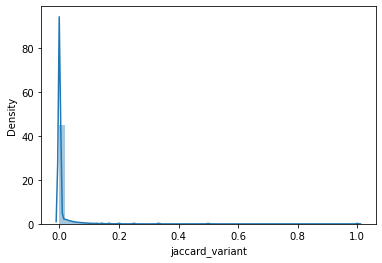

In [36]:
import seaborn as sns, numpy as np
ax = sns.distplot(raw_dda_df["jaccard_variant"])

/root/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


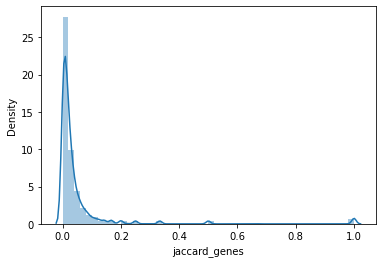

In [37]:
import seaborn as sns, numpy as np
ax = sns.distplot(raw_dda_df["jaccard_genes"])